#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

# Solution

## Import Libraries:

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
import plotly.express as px
import sys
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import BisectingKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer,util


%matplotlib inline

In [231]:
# nltk.download('wordnet')

In [232]:
# nltk.download('stopwords')

## Functions that is used:

In [233]:
def info_df_with_missing_ratio(df):
    
    """
    _summary_
    this function takes data frame and return information dataframe that contains data types, missing values, missing values ratio and rounded missing value ratio
    of orginal dataframe values

    Returns:
        _datafram_: _information dataframe that contains data types, missing values, missing values ratio and rounded missing value ratio _
    """
    
    # get dataframe columns types
    info_df = pd.DataFrame(df.dtypes)

    # identifying the missing values from the dataset.
    info_df['missing_val'] = df.isnull().sum()

    # calculate float and rounded missing values ratio
    info_df['missing_val_ratio'] = (info_df['missing_val'] / df.shape[0] * 100)
    info_df['rounded_missing_val_ratio'] = info_df['missing_val_ratio'].round().astype(int)


    # renaming the first column using rename()
    info_df = info_df.rename(columns = {0:'data_type'})
    
    return info_df

In [234]:
def print_progress_bar(iteration, total, prefix='Progress:', suffix='Complete', decimals=1, length=100, fill='█', print_end="\n"):
    """_summary_
    
    This function is used to print progress bar 

    Args:
        iteration (int): current iteration.
        total (int): maximun number of iterations.
        prefix (str, optional): the word before the bar. Defaults to 'Progress:'.
        suffix (str, optional): the word after the bar. Defaults to 'Complete'.
        decimals (int, optional): number of decimals to print. Defaults to 1.
        length (int, optional): bar length. Defaults to 100.
        fill (str, optional): filling character. Defaults to '█'.
        print_end (str, optional): stering that will print after ending the progress. Defaults to "\n".
    """
    
    # percent number
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    
    # filled length
    filled_length = int(length * iteration // total)
    
    # the progress bar
    bar = fill * filled_length + '-' * (length - filled_length)
    
    # print the progress bar
    sys.stdout.write('\r%s |%s| %s%% %s' % (prefix, bar, percent, suffix))
    
    # if progress finished print the print_end parameter
    if iteration == total:
        sys.stdout.write(print_end)
    
    # clear the output
    sys.stdout.flush()

The function below are used in pandas pipes :

In [235]:
def delete_negative_values(df, numeric_cols):
    """_summary_
    
    This function delete negative values from dataframe

    Args:
        df (Dataframe): target dataframe
        numeric_cols (List|str): target columns

    Returns:
        Dataframe: Dataframe after applying changes 
    """
    
    mask = ((df[numeric_cols] >= 0) | df[numeric_cols].isna()).all(axis=1)
    
    return df[mask]

In [236]:
def drop_columns(df,col_names=[]):
    """_summary_
    
    This function drop columns from dataframe

    Args:
        df (Dataframe): target dataframe
        numeric_cols (List|str): target columns

    Returns:
        Dataframe: Dataframe after applying changes 
    """
    
    return df.drop(columns=col_names)

In [237]:
def drop_nans(df, subset=[]):
    """_summary_
    
    This function drop nans from dataframe

    Args:
        df (Dataframe): target dataframe
        numeric_cols (List|str): target columns

    Returns:
        Dataframe: Dataframe after applying changes 
    """
    return df.dropna(subset=subset)

In [238]:
def upper_case(df,col_name):
    """_summary_
    
    This function uppercase strings dataframe columns

    Args:
        df (Dataframe): target dataframe
        numeric_cols (List|str): target columns

    Returns:
        Dataframe: Dataframe after applying changes 
    """
    df[col_name] = df[col_name].apply(lambda row: row.upper())
    return df

In [239]:
def lower_case(df,col_name):
    """_summary_
    
    This function delete negative values from dataframe

    Args:
        df (Dataframe): target dataframe
        numeric_cols (List|str): target columns

    Returns:
        Dataframe: Dataframe after applying changes 
    """
    
    df[col_name] = df[col_name].apply(lambda row: row.lower())
    return df

In [240]:
def remove_non_alphabet(df,col_name):
    """_summary_
    
    This function delete non alphabet character from dataframe

    Args:
        df (Dataframe): target dataframe
        numeric_cols (List|str): target columns

    Returns:
        Dataframe: Dataframe after applying changes 
    """
    
    df[col_name] = df[col_name].apply(lambda row: re.sub(r'\W|_',' ',row))
    return df

In [241]:
def remove_numbers(df, col_name):
    """_summary_
    
    This function delete numbers from dataframe

    Args:
        df (Dataframe): target dataframe
        numeric_cols (List|str): target columns

    Returns:
        Dataframe: Dataframe after applying changes 
    """
    
    df[col_name] = df[col_name].apply(lambda row: re.sub(r'[0-9]+',' ',row))
    return df

In [242]:
def remove_roman_numerals(df, col_name):
    """_summary_
    
    This function delete roman number from dataframe

    Args:
        df (Dataframe): target dataframe
        numeric_cols (List|str): target columns

    Returns:
        Dataframe: Dataframe after applying changes 
    """
    
    df[col_name] = df[col_name].apply(lambda row: re.sub(r'\bM{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})\b','',row))
    return df

In [243]:
def remove_unimportant_words(df ,col_name, pattern):
    """_summary_
    
    This function remove unimportant words from dataframe using regular expressions
    
    Args:
        df (Dataframe): target dataframe
        col_name (List|str): target columns
        pattern (str): string that contain unimportant words

    Returns:
        Dataframe: Dataframe after applying changes 
    """
    
    df[col_name] = df[col_name].apply(lambda row: re.sub(pattern,'',row))
    return df

In [244]:
def replace_pattern(df, col_name, pattern, word):
    """_summary_
    
    This function replace pattern from dataframe with specific word using regular expressions

    Args:
        df (Dataframe): target dataframe
        col_name (List|str): target columns
        pattern (str): string to replace
        word (str): The word to be replaced

    Returns:
       Dataframe: Dataframe after applying changes
    """
    
    df[col_name] = df[col_name].apply(lambda row: re.sub(pattern,word,row))
    return df

In [245]:
def remove_extra_white_Spaces(df,col_name):
    
    """_summary_
    
    This function remove extra white spacesr from dataframe columns

    Args:
        df (Dataframe): target dataframe
        numeric_cols (List|str): target columns

    Returns:
        Dataframe: Dataframe after applying changes 
    """
    
    df[col_name] = df[col_name].apply(lambda row: re.sub(r'\s+',' ',row))
    df[col_name] = df[col_name].apply(lambda row: re.sub(r'^\s|\s$','',row))
    return df

In [246]:
def white_sapce_tokenizer(df,col_name):
    """_summary_
    
    This function tokenizer dataframe column using white space

    Args:
        df (Dataframe): target dataframe
        numeric_cols (List|str): target columns

    Returns:
        Dataframe: Dataframe after applying changes 
    """
    df[col_name] = df[col_name].apply(lambda row: row.split(' '))
    
    return df
    

In [247]:
def remove_stopwords(df,col_name,stopwords):
    """_summary_
    
    This function remove stop words from dataframe column
    
    Args:
        df (Dataframe): target dataframe
        numeric_cols (list|str): target columns
        stopwords (list): stopwords string list

    Returns:
       Dataframe: Dataframe after applying changes 
    """
    
    df[col_name] = df[col_name].apply(lambda row: [token for token in row if token.lower() not in stopwords])
    
    return df

In [248]:
def apply_stemmer(df,col_name,stemmer):
    """_summary_
    
    This function apply stemming on dataframe column using specific stemmer

    Args:
        df (Dataframe): target dataframe
        col_name (list|str): target columns
        stemmer (Stemmer): specific stemmer to apply

    Returns:
        Dataframe: Dataframe after applying changes 
    """
    
    df[col_name] = df[col_name].apply(lambda row: [stemmer.stem(token) for token in row])
    
    return df

In [249]:
def join_list(df, col_name, join_char):
    """_summary_
    
    This function join string list in dataframe column

    Args:
        df (Dataframe): target dataframe
        col_name (list|str): target columns
        join_char (_type_): _description_

    Returns:
       Dataframe: Dataframe after applying changes 
    """
    
    df[col_name] = df[col_name].apply(lambda row: join_char.join(row))
    
    return df

## Load Salaries Dataset:

In [250]:
# Load your dataset
df = pd.read_csv('./content/Salaries.csv')
df.head(10)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN


In [251]:
df.shape

(148654, 13)

In [252]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

## A. Basic Data Exploration:

In [253]:
print(f"The number of raws: {df.shape[0]}")
print(f"The number of columns: {df.shape[1]}")

The number of raws: 148654
The number of columns: 13


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [255]:
info_df_with_missing_ratio(df)

,data_type,missing_val,missing_val_ratio,rounded_missing_val_ratio
Id,int64,0,0.000000,0
EmployeeName,object,0,0.000000,0
JobTitle,object,0,0.000000,0
BasePay,float64,609,0.409676,0
OvertimePay,float64,4,0.002691,0
OtherPay,float64,4,0.002691,0
Benefits,float64,36163,24.326961,24
TotalPay,float64,0,0.000000,0
TotalPayBenefits,float64,0,0.000000,0
Year,int64,0,0.000000,0


We notice that we have two columns don't have any value rather NAN (Notes,Status) also 24% of Benefits column and 0.4% of BasePay column are NaNs values

## B. Descriptive Statistics:

In [256]:
df['Year'].unique()

array([2011, 2012, 2013, 2014], dtype=int64)

The datafram contains employees data from 2011 to 2014.

In [257]:
numeric_cols = ['BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits']
categorical = ['JobTitle','Agency']
ordinal = ['Year']

In [258]:
df[numeric_cols].describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
count,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000
mean,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811
std,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483
min,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000
25%,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000
50%,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000
75%,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000


More than 50% of employees don't work overtime  <br>
also more than 25% of employees dont have other pay <br> 
and there some unlogical values in numerical columns (negative values)

In [259]:
df['TotalPay'].mode()

0    0.0
Name: TotalPay, dtype: float64

In [260]:
df['TotalPay'][df['TotalPay']==0.0].count()

368

The mod is zero and that means employees have no salary in dataset and that maybe mean they took unpaid vacation during these years or they are volunteers.

In [261]:
df[categorical].describe()

,JobTitle,Agency
count,148654,148654
unique,2159,1
top,Transit Operator,San Francisco
freq,7036,148654


Transit Operator is the most common job <br>
and all jobs in the dataset belong to one agency (San Francisco) so that the Agency column don't have any important information

In [262]:
df[ordinal].astype(str).describe() # type: ignore

,Year
count,148654
unique,4
top,2014
freq,38123


In [263]:
df[ordinal].describe()

,Year
count,148654.000000
mean,2012.522643
std,1.117538
min,2011.000000
25%,2012.000000
50%,2013.000000
75%,2014.000000
max,2014.000000


In [264]:
print(f"The salary range : {df['TotalPay'].max()-df['TotalPay'].min()}")

The salary range : 568213.56


The dataset have a wide salary range and that means there are a big variace between there salaries also the salary have high standard deviation and that mean there is outliers (negative values). 

## C. Data Cleaning:

In [265]:
cleaned_df = df.copy()

In [266]:
cleaned_df.shape

(148654, 13)

In [267]:
cleaned_df['Agency'].unique()

array(['San Francisco'], dtype=object)

* Notes and Status are NANs.
* Agency only have one value ("San Francisco").
* Id and EmployeeName are unique for every column.

All these columns are not important so we will drop them.

Also we will drop nans from all column that have less than 0.5% of nans.

In [268]:
cleaned_df = cleaned_df.pipe(delete_negative_values,numeric_cols).pipe(drop_columns,['Notes','Status','Id','EmployeeName','Agency']).pipe(drop_nans,['OtherPay','OvertimePay','BasePay'])

Also some employees has "Not provided" rows so we will drop them.

In [269]:
df[df['EmployeeName']=='Not provided'].shape

(4, 13)

In [270]:
df = df[df['EmployeeName']!='Not provided']

In [271]:
cleaned_df.shape

(148027, 8)

In [272]:
info_df_with_missing_ratio(cleaned_df)

,data_type,missing_val,missing_val_ratio,rounded_missing_val_ratio
JobTitle,object,0,0.0000,0
BasePay,float64,0,0.0000,0
OvertimePay,float64,0,0.0000,0
OtherPay,float64,0,0.0000,0
Benefits,float64,36159,24.4273,24
TotalPay,float64,0,0.0000,0
TotalPayBenefits,float64,0,0.0000,0
Year,int64,0,0.0000,0


We can not drop rows that have Nans values in "Benefits" column because they are about 24% so that we will use data imputation techniques.

In [273]:
cleaned_df.isna().any()

JobTitle            False
BasePay             False
OvertimePay         False
OtherPay            False
Benefits             True
TotalPay            False
TotalPayBenefits    False
Year                False
dtype: bool

* We will group 'Benefits' column by 'JobTitle' and we will caculate the median foe every JobTitle and we will fill 'Benefits' Nans by there 'JobTitle' benefit median.
* we chose the median because it less sensitive to outliers and that because 'Benefit' column have high STD value.

In [274]:
estimation_df = cleaned_df[['JobTitle','Benefits']]
estimation_df = estimation_df.groupby('JobTitle')
estimation_df = estimation_df.median().fillna(0).reset_index().rename(columns={'Benefits':'medians'})

In [275]:
cleaned_df = cleaned_df.merge(estimation_df,on="JobTitle",how='left')
cleaned_df['Benefits'] = cleaned_df['Benefits'].fillna(cleaned_df['medians'])
cleaned_df.drop('medians', axis=1 ,inplace=True)

In [276]:
cleaned_df.shape

(148027, 8)

In [277]:
cleaned_df.isna().any().any()

False

In [278]:
info_df_with_missing_ratio(cleaned_df)

,data_type,missing_val,missing_val_ratio,rounded_missing_val_ratio
JobTitle,object,0,0.0,0
BasePay,float64,0,0.0,0
OvertimePay,float64,0,0.0,0
OtherPay,float64,0,0.0,0
Benefits,float64,0,0.0,0
TotalPay,float64,0,0.0,0
TotalPayBenefits,float64,0,0.0,0
Year,int64,0,0.0,0


In [279]:
cleaned_df[numeric_cols].describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
count,148027.000000,148027.000000,148027.000000,148027.000000,148027.000000,148027.000000
mean,66331.428168,5087.334185,3646.079395,18981.854008,75064.841748,94046.695756
std,42762.323488,11473.751595,8019.832754,17176.358349,50407.656154,62680.706812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33599.910000,0.000000,0.000000,0.000000,36989.785000,45100.210000
50%,65010.820000,0.000000,817.590000,23471.230000,71649.200000,92680.690000
75%,94691.060000,4696.820000,4243.500000,33508.710000,106031.075000,133096.950000
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000


## D. Basic Data Visualization:

### I. Salary distribution visualization:

<Axes: xlabel='TotalPay', ylabel='Count'>

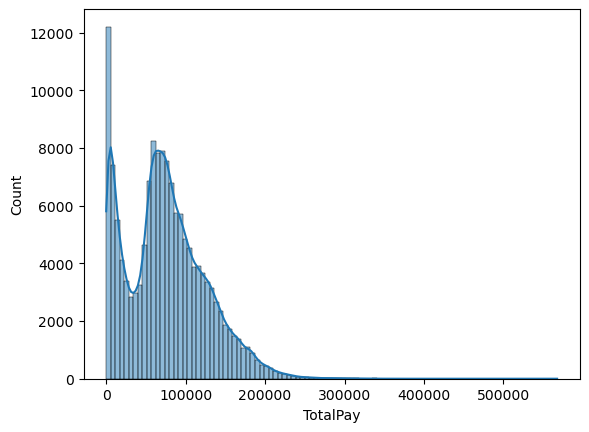

In [280]:
sns.histplot(cleaned_df['TotalPay'],kde=True,bins=100)

* there are alot of employees have low salary (<10000$) and there are about 368 employees with 0 salary.
* most of salaries are between 50000$-150000$. 

### II. Proportion of employees in different departments:

**Jobs departments are not in the dataset.** 

In [281]:
text = " ".join(cleaned_df['JobTitle'])
wordcloud = WordCloud().generate(text)

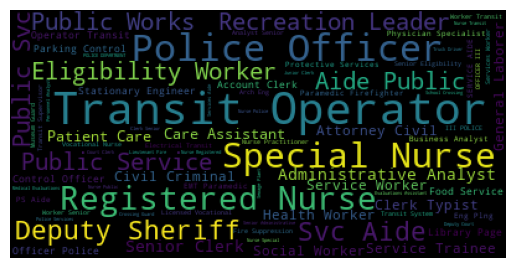

<Figure size 1200x1200 with 0 Axes>

In [282]:
plt.imshow(wordcloud)
plt.axis('off')
plt.figure(figsize=(12,12))
plt.show()

In [283]:
len(cleaned_df['JobTitle'].unique())

2154

also we have 2154 unique job title so we need to cluster them into departments so we will try to do that using NLP techniques

* We will use bag of word model and sentence embedding to encode title and on each one we will use three clustering algorithm:
1. KMeans.
2. BisectingKMeans.
3. SpectralClustering.

* And we will select the best one depends on three measures:

1. Silhouette score:  which measures each data point’s similarity to the cluster it belongs to and how different it is from other clusters.
2. Calinski harabasz score: which measures the ratio of the sum of between-cluster dispersion and of within-cluster dispersion for all clusters.
3. Davies bouldin score: which measures the average similarity measure of each cluster with its most similar cluster.

* And we will try to cluster them to [7-10] clusters.

* First step is text preprocessing we will do these steps on job titles:

1. Convert them to upper case.
2. Remove non-alphabet character.
3. Remove numbers.
4. Remove roman numerals (V, VI, IX, ......etc).
5. Remove unimportant words (senior, junior, .....etc).
6. Replace some shorcuts like 'MGR' with there meaning 'MANAGER'.
7. Remove extra white spaces.
8. tokenize them using white space tokenizer.
9. Remove stopwords.
10. Apply word stemming (for bag of word model only).
11. Join the tokens.
12. Convert them to lower case.

In [284]:
dep_table = pd.DataFrame()
dep_table['JobTitle'] = cleaned_df['JobTitle']
dep_table['Processed_JobTitle'] = dep_table['JobTitle']

In [285]:
join_char = " "
english_stopwords = nltk.corpus.stopwords.words('english')
unimporatnt_words = r'\b(SENIOR|SUPERVISOR|CHIEF|DEPUTY|DEPARTMENT|EMPLOYEE|STAFF|ASSISTANT|SPECIALIST|SPRV|SUPR|SR|ASST|SVC|SPEC|CHF|GENERAL|JUNIOR|SUPV|INTOR|OFC|TECH|WRK|PUBLIC)\b'
stemmer = nltk.LancasterStemmer()

In [286]:
# Bag of woards preprocessing table
dep_table_bow = dep_table.copy().pipe(upper_case, 'Processed_JobTitle')  \
                                .pipe(remove_non_alphabet, 'Processed_JobTitle')  \
                                .pipe(remove_numbers, 'Processed_JobTitle')  \
                                .pipe(remove_roman_numerals, 'Processed_JobTitle')  \
                                .pipe(remove_unimportant_words, 'Processed_JobTitle', unimporatnt_words)  \
                                .pipe(replace_pattern ,'Processed_JobTitle' ,r'\bMGR\b','MANAGER')  \
                                .pipe(replace_pattern ,'Processed_JobTitle' ,r'\bDIR\b','DIRECTOR')  \
                                .pipe(replace_pattern ,'Processed_JobTitle' ,r'\bHLTH\b','HEALTH')  \
                                .pipe(replace_pattern ,'Processed_JobTitle' ,r'\bENGR|ENG\b','ENGINEER')  \
                                .pipe(remove_extra_white_Spaces, 'Processed_JobTitle')  \
                                .pipe(white_sapce_tokenizer, 'Processed_JobTitle')  \
                                .pipe(remove_stopwords, 'Processed_JobTitle', english_stopwords)  \
                                .pipe(apply_stemmer, 'Processed_JobTitle', stemmer)  \
                                .pipe(join_list, 'Processed_JobTitle', ' ')  \
                                .pipe(lower_case, 'Processed_JobTitle')
                     

In [287]:
# sentence embeddings preprocessing table
dep_table_emb = dep_table.copy().pipe(upper_case, 'Processed_JobTitle')  \
                                .pipe(remove_non_alphabet, 'Processed_JobTitle')  \
                                .pipe(remove_numbers, 'Processed_JobTitle')  \
                                .pipe(remove_roman_numerals, 'Processed_JobTitle')  \
                                .pipe(remove_unimportant_words, 'Processed_JobTitle', unimporatnt_words)  \
                                .pipe(replace_pattern ,'Processed_JobTitle' ,r'\bMGR\b','MANAGER')  \
                                .pipe(replace_pattern ,'Processed_JobTitle' ,r'\bDIR\b','DIRECTOR')  \
                                .pipe(replace_pattern ,'Processed_JobTitle' ,r'\bHLTH\b','HEALTH')  \
                                .pipe(replace_pattern ,'Processed_JobTitle' ,r'\bENGR|ENG\b','ENGINEER')  \
                                .pipe(remove_extra_white_Spaces, 'Processed_JobTitle')  \
                                .pipe(white_sapce_tokenizer, 'Processed_JobTitle')  \
                                .pipe(remove_stopwords, 'Processed_JobTitle', english_stopwords)  \
                                .pipe(join_list, 'Processed_JobTitle', ' ')  \
                                .pipe(lower_case, 'Processed_JobTitle')

In [288]:
dep_table_bow

,JobTitle,Processed_JobTitle
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,man metropolit transit auth
1,CAPTAIN III (POLICE DEPARTMENT),captain pol
2,CAPTAIN III (POLICE DEPARTMENT),captain pol
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,wir rop cabl maint mech
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",fir
...,...,...
148022,"Stationary Eng, Sewage Plant",stat engin sew plant
148023,Human Services Technician,hum serv techn
148024,Communications Dispatcher 2,commun dispatch
148025,Custodian,custod


In [289]:
dep_table_emb

,JobTitle,Processed_JobTitle
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,manager metropolitan transit authority
1,CAPTAIN III (POLICE DEPARTMENT),captain police
2,CAPTAIN III (POLICE DEPARTMENT),captain police
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,wire rope cable maintenance mechanic
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",fire
...,...,...
148022,"Stationary Eng, Sewage Plant",stationary engineer sewage plant
148023,Human Services Technician,human services technician
148024,Communications Dispatcher 2,communications dispatcher
148025,Custodian,custodian


In [290]:
# Calculate number of words in bag of woards preprocessing table
len(set(" ".join(dep_table_bow['Processed_JobTitle']).split(" ")))

626

In [291]:
# Calculate number of words in senyence embedding preprocessing table
len(set(" ".join(dep_table_emb['Processed_JobTitle']).split(" ")))

782

In [292]:
# Calculate The number of unique jobs after preprocessing
len(dep_table_emb['Processed_JobTitle'].unique())

1033

In [293]:
wordcloud = WordCloud().generate(text)

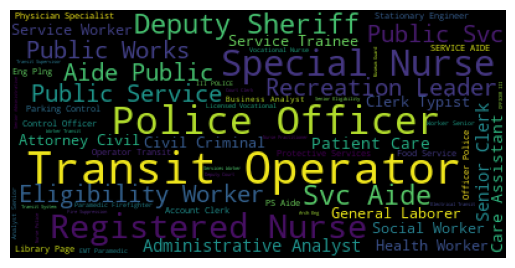

<Figure size 1200x1200 with 0 Axes>

In [294]:
plt.imshow(wordcloud)
plt.axis('off')
plt.figure(figsize=(12,12))
plt.show()

In [295]:
corpus_emb = dep_table_emb['Processed_JobTitle'].unique().tolist()

In [296]:
corpus_bow = set(dep_table_bow['Processed_JobTitle'].unique().tolist())

In [297]:
vectorizer = CountVectorizer()

In [298]:
embedder = SentenceTransformer('all-MiniLM-L6-v2')

In [299]:
corpus_bow_embeddings = vectorizer.fit_transform(corpus_bow).toarray() # type: ignore

In [300]:
corpus_emb_embeddings = embedder.encode(corpus_emb) # type: ignore

#### 1. Bag Of Word:

In [301]:
corpus_bow_embeddings.shape

(983, 622)

In [302]:
k_min = 7
k_max = 11
scores = []
np_embeddings = np.array(corpus_bow_embeddings)
for k in range(k_min,k_max):
    print_progress_bar(k, k_max-1,length=50)
    kmeans = KMeans(n_clusters=k, n_init='auto',random_state=1)
    kmeans.fit(np_embeddings)
    labels = kmeans.labels_
    scores.append([k, silhouette_score(np_embeddings, labels), calinski_harabasz_score(np_embeddings, labels), davies_bouldin_score(np_embeddings, labels)])

scores = pd.DataFrame(scores, columns=('cluster', 'silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score'))
scores.sort_values(by='calinski_harabasz_score',ascending=False).head()

Progress: |██████████████████████████████████████████████████| 100.0% Complete


,cluster,silhouette_score,calinski_harabasz_score,davies_bouldin_score
2,9,-0.020835,8.155549,2.109346
3,10,-0.021363,7.473080,1.969174
0,7,-0.030023,7.299112,2.341060
1,8,-0.027323,7.212690,2.047672


In [303]:
k_min = 7
k_max = 11
scores = []
np_embeddings = np.array(corpus_bow_embeddings)
for k in range(k_min,k_max):
    print_progress_bar(k, k_max-1,length=50)
    kmeans = BisectingKMeans(n_clusters=k, random_state=1)
    kmeans.fit(np_embeddings)
    labels = kmeans.labels_
    scores.append([k, silhouette_score(np_embeddings, labels), calinski_harabasz_score(np_embeddings, labels), davies_bouldin_score(np_embeddings, labels)])

scores = pd.DataFrame(scores, columns=('cluster', 'silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score'))
scores.sort_values(by='calinski_harabasz_score',ascending=False).head()

Progress: |██████████████████████████████████████████████████| 100.0% Complete


,cluster,silhouette_score,calinski_harabasz_score,davies_bouldin_score
3,10,0.038688,12.361392,2.574107
2,9,0.034227,12.346611,2.562158
1,8,0.027612,11.830864,2.542779
0,7,0.019966,10.779259,2.501846


In [304]:
k_min = 7
k_max = 11
scores = []
np_embeddings = np.array(corpus_bow_embeddings)
for k in range(k_min,k_max):
    print_progress_bar(k, k_max-1,length=50)
    kmeans = AgglomerativeClustering(n_clusters=k, metric='euclidean')
    kmeans.fit(np_embeddings)
    labels = kmeans.labels_
    scores.append([k, silhouette_score(np_embeddings, labels), calinski_harabasz_score(np_embeddings, labels), davies_bouldin_score(np_embeddings, labels)])

scores = pd.DataFrame(scores, columns=('cluster', 'silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score'))
scores.sort_values(by='calinski_harabasz_score',ascending=False).head()

Progress: |██████████████████████████████████████████████████| 100.0% Complete


,cluster,silhouette_score,calinski_harabasz_score,davies_bouldin_score
0,7,0.011518,12.638697,3.518706
1,8,0.014511,12.293786,3.418570
2,9,0.017477,12.033423,3.367519
3,10,0.019496,11.834539,3.201750


In [305]:
k_min = 7
k_max = 11

scores = []
np_embeddings = np.array(corpus_bow_embeddings)
for k in range(k_min,k_max):
    print_progress_bar(k, k_max-1,length=50)
    kmeans = SpectralClustering(n_clusters=k, affinity='rbf',
                           gamma=0.9, 
                           assign_labels='kmeans')
    kmeans.fit(np_embeddings)
    labels = kmeans.labels_
    scores.append([k, silhouette_score(np_embeddings, labels), calinski_harabasz_score(np_embeddings, labels), davies_bouldin_score(np_embeddings, labels)])

scores = pd.DataFrame(scores, columns=('cluster', 'silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score'))
scores.sort_values(by='calinski_harabasz_score',ascending=False).head()

Progress: |██████████████████████████████████████████████████| 100.0% Complete


,cluster,silhouette_score,calinski_harabasz_score,davies_bouldin_score
0,7,0.054942,7.664325,1.640688
1,8,0.055759,7.635993,1.641062
2,9,0.053276,7.475077,1.660300
3,10,0.053414,7.005706,1.647522


#### 2. Sentence Embeddings:

In [306]:
k_min = 7
k_max = 11
scores = []
np_embeddings = np.array(corpus_emb_embeddings)
for k in range(k_min,k_max):
    #print_progress_bar(k, k_max-1,length=50)
    kmeans = KMeans(n_clusters=k, n_init='auto',random_state=3)
    kmeans.fit(np_embeddings)
    labels = kmeans.labels_
    scores.append([k, silhouette_score(np_embeddings, labels), calinski_harabasz_score(np_embeddings, labels), davies_bouldin_score(np_embeddings, labels)])

scores = pd.DataFrame(scores, columns=('cluster', 'silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score'))
scores.sort_values(by='calinski_harabasz_score',ascending=False).head(10)

,cluster,silhouette_score,calinski_harabasz_score,davies_bouldin_score
0,7,0.032124,23.456137,3.946924
1,8,0.032786,21.694057,4.021616
2,9,0.033327,20.978471,3.811442
3,10,0.036250,19.960100,3.741516


In [307]:
k_min = 7
k_max = 11
scores = []
np_embeddings = np.array(corpus_emb_embeddings)
for k in range(k_min,k_max):
    print_progress_bar(k, k_max-1,length=50)
    kmeans = BisectingKMeans(n_clusters=k, random_state=2)
    kmeans.fit(np_embeddings)
    labels = kmeans.labels_
    scores.append([k, silhouette_score(np_embeddings, labels), calinski_harabasz_score(np_embeddings, labels), davies_bouldin_score(np_embeddings, labels)])

scores = pd.DataFrame(scores, columns=('cluster', 'silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score'))
scores.sort_values(by='calinski_harabasz_score',ascending=False).head(10)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


,cluster,silhouette_score,calinski_harabasz_score,davies_bouldin_score
0,7,0.020421,20.522654,4.488557
1,8,0.023391,19.330956,4.403303
2,9,0.022988,18.104402,4.456945
3,10,0.025200,17.393885,4.342827


In [308]:
k_min = 7
k_max = 11
scores = []
np_embeddings = np.array(corpus_emb_embeddings)
for k in range(k_min,k_max):
    print_progress_bar(k, k_max-1,length=50)
    kmeans = AgglomerativeClustering(n_clusters=k, metric='euclidean')
    kmeans.fit(np_embeddings)
    labels = kmeans.labels_
    scores.append([k, silhouette_score(np_embeddings, labels), calinski_harabasz_score(np_embeddings, labels), davies_bouldin_score(np_embeddings, labels)])

scores = pd.DataFrame(scores, columns=('cluster', 'silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score'))
scores.sort_values(by='calinski_harabasz_score',ascending=False).head()

Progress: |███████████████████████████████████---------------| 70.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete


,cluster,silhouette_score,calinski_harabasz_score,davies_bouldin_score
0,7,0.012374,17.700677,4.358465
1,8,0.015358,17.104962,4.141285
2,9,0.013233,16.627387,3.993194
3,10,0.017482,16.165559,4.103353


In [309]:
k_min = 7
k_max = 11

scores = []
np_embeddings = np.array(corpus_emb_embeddings)
for k in range(k_min,k_max):
    print_progress_bar(k, k_max-1,length=50)
    kmeans = SpectralClustering(n_clusters=k, affinity='rbf',
                                gamma=0.9, assign_labels='kmeans')
    kmeans.fit(np_embeddings)
    labels = kmeans.labels_
    scores.append([k, silhouette_score(np_embeddings, labels), calinski_harabasz_score(np_embeddings, labels), davies_bouldin_score(np_embeddings, labels)])

scores = pd.DataFrame(scores, columns=('cluster', 'silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score'))
scores.sort_values(by='calinski_harabasz_score',ascending=False).head()

Progress: |██████████████████████████████████████████████████| 100.0% Complete


,cluster,silhouette_score,calinski_harabasz_score,davies_bouldin_score
0,7,0.025382,22.609477,4.126377
1,8,0.031171,21.878837,3.890601
2,9,0.033785,20.702818,3.798765
3,10,0.034761,19.930401,3.659286


#### 3. Selecting Model and Final Clustering:

We will select Kmeans with Sentence Embeddings with:
* 7 Clusters.
* Calinski harabasz score: 23.46.
* Davies bouldin score: 3.95.
* Silhouette score: 0.032.

which has the best Calinski harabasz score and Davies bouldin score but the Silhouette score is near to 0 and that means the clusters are overlapped however, it is the best model in the models that we tried.

In [310]:
kmeans = KMeans(n_clusters=7, n_init='auto',random_state=3)

In [311]:
dep_table = dep_table_emb
dep_table

,JobTitle,Processed_JobTitle
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,manager metropolitan transit authority
1,CAPTAIN III (POLICE DEPARTMENT),captain police
2,CAPTAIN III (POLICE DEPARTMENT),captain police
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,wire rope cable maintenance mechanic
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",fire
...,...,...
148022,"Stationary Eng, Sewage Plant",stationary engineer sewage plant
148023,Human Services Technician,human services technician
148024,Communications Dispatcher 2,communications dispatcher
148025,Custodian,custodian


In [312]:
label_table = pd.DataFrame(dep_table['Processed_JobTitle'].unique()).rename(columns={0:'Processed_JobTitle'})
label_table

,Processed_JobTitle
0,manager metropolitan transit authority
1,captain police
2,wire rope cable maintenance mechanic
3,fire
4,
...,...
1028,apprentice cement mason
1029,marina associate manager
1030,cnselor juv hall sfers
1031,forensic toxicologist supervis


In [313]:
embedded_sentences = embedder.encode(label_table['Processed_JobTitle'].tolist())
embedded_sentences.shape # type: ignore

(1033, 384)

In [314]:
labels = kmeans.fit_predict(embedded_sentences)

In [315]:
set(labels)

{0, 1, 2, 3, 4, 5, 6}

In [316]:
label_table['label'] = labels

In [317]:
label_table

,Processed_JobTitle,label
0,manager metropolitan transit authority,5
1,captain police,6
2,wire rope cable maintenance mechanic,2
3,fire,0
4,,0
...,...,...
1028,apprentice cement mason,2
1029,marina associate manager,3
1030,cnselor juv hall sfers,0
1031,forensic toxicologist supervis,4


In [318]:
dep_table = pd.merge(dep_table,label_table,on='Processed_JobTitle',how='left')
dep_table

,JobTitle,Processed_JobTitle,label
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,manager metropolitan transit authority,5
1,CAPTAIN III (POLICE DEPARTMENT),captain police,6
2,CAPTAIN III (POLICE DEPARTMENT),captain police,6
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,wire rope cable maintenance mechanic,2
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",fire,0
...,...,...,...
148022,"Stationary Eng, Sewage Plant",stationary engineer sewage plant,2
148023,Human Services Technician,human services technician,4
148024,Communications Dispatcher 2,communications dispatcher,5
148025,Custodian,custodian,3


In [319]:
dep_table[dep_table['label']==0].groupby('Processed_JobTitle').count().sort_values(by='JobTitle',ascending=False).head(10)

,JobTitle,label
Processed_JobTitle,,
porter,1521,1521
gardener,1182,1182
library page,1107,1107
painter,523,523
safetycomm disp,472,472
library technical,443,443
library,392,392
diagnostic imaging,350,350
program,296,296


In [320]:
dep_table[dep_table['label']==1].groupby('Processed_JobTitle').count().sort_values(by='JobTitle',ascending=False).head(10)

,JobTitle,label
Processed_JobTitle,,
clerk,2840,2840
attorney civil criminal,1506,1506
court clerk,786,786
counselor juvenile hall,512,512
principal clerk,454,454
legal secretary,294,294
child support officer,282,282
legal process clerk,263,263
custodial,257,257


In [321]:
dep_table[dep_table['label']==2].groupby('Processed_JobTitle').count().sort_values(by='JobTitle',ascending=False).head(10)

,JobTitle,label
Processed_JobTitle,,
engineer,1976,1976
laborer,1579,1579
stationary engineer,1083,1083
truck driver,707,707
stationary engineer sewage plant,674,674
automotive mechanic,634,634
stdntdsgntrain arch engineer plng,621,621
assoc engineer,506,506
electrician,462,462


In [322]:
dep_table[dep_table['label']==3].groupby('Processed_JobTitle').count().sort_values(by='JobTitle',ascending=False).head(15)

,JobTitle,label
Processed_JobTitle,,
custodian,3205,3205
manager,2860,2860
clerk typist,1531,1531
administrative analyst,1517,1517
librarian,1011,1011
account clerk,934,934
accountant,750,750
personnel analyst,722,722
management,644,644


In [323]:
dep_table[dep_table['label']==4].groupby('Processed_JobTitle').count().sort_values(by='JobTitle',ascending=False).head(10)

,JobTitle,label
Processed_JobTitle,,
special nurse,5783,5783
registered nurse,4944,4944
aide works,2514,2514
eligibility worker,2098,2098
patient care,1940,1940
service trainee,1655,1655
health worker,1466,1466
physician,1132,1132
emt paramedic firefighter,914,914


In [324]:
dep_table[dep_table['label']==5].groupby('Processed_JobTitle').count().sort_values(by='JobTitle',ascending=False).head(10)

,JobTitle,label
Processed_JobTitle,,
transit operator,9363,9363
transit,811,811
electrical transit system mech,629,629
transit car cleaner,384,384
communications dispatcher,254,254
fare collections receiver,228,228
electrical transit system mechanic,204,204
transit fare inspector,198,198
airport police services aide,187,187


In [325]:
dep_table[dep_table['label']==6].groupby('Processed_JobTitle').count().sort_values(by='JobTitle',ascending=False).head(10)

,JobTitle,label
Processed_JobTitle,,
police officer,6625,6625
firefighter,3142,3142
sheriff,3037,3037
recreation leader,2660,2660
parking control officer,1254,1254
sergeant,1177,1177
protective services worker,822,822
museum guard,821,821
school crossing guard,711,711


In [326]:
wordclouds = { i:WordCloud().generate(" ".join(dep_table[dep_table['label']==i]['Processed_JobTitle'])) for i in range(0,7) }

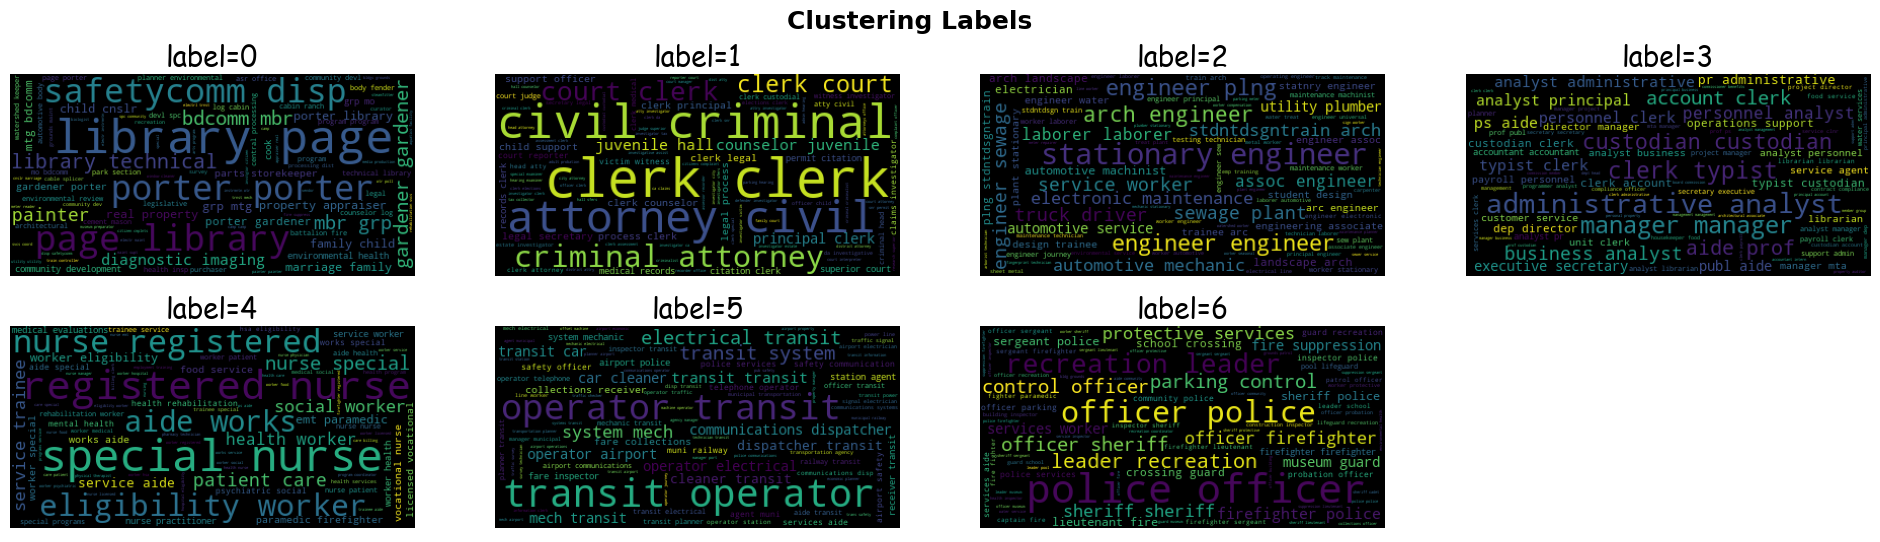

In [327]:
fig, axs = plt.subplots(2,4,figsize=(10,5))
axs[1,3].axis('off')

i = 0
j = 0

for k in range(0,7):
        
    axs[i, j].set_title(f"label={k}", fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})
    axs[i, j].axis('off')
    axs[i, j].imshow(wordclouds[k])
    axs[i, j].get_figure().set_size_inches(24, 6)
    
    if j == 3:
        i=1
        j=0
    else:
        j = j+1
   
fig.suptitle('Clustering Labels',weight='bold',size=18)
plt.show()

* Depending on frequent job titles and wordclouds we selected these departments:
1. 1:Law and codification.
2. 3:Business and public services.
3. 4:Health care.
4. 5:Government and transit.
5. 6:Security and emergency.
6. 0&2:Others.

In [328]:
labels = {0:"Others",2:"Others",5:"Government and transit",1:"Law and codification",3:"Business and public services",6:"Security and emergency",4:"Health care"}

After that we will draw the pie chart:

In [329]:
dep_table['label'] = dep_table['label'].map(labels)
dep_table.rename({"label":"department"},inplace=True)

In [330]:
dep_table.rename(columns={"label":"Department"},inplace=True)
dep_table

,JobTitle,Processed_JobTitle,Department
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,manager metropolitan transit authority,Government and transit
1,CAPTAIN III (POLICE DEPARTMENT),captain police,Security and emergency
2,CAPTAIN III (POLICE DEPARTMENT),captain police,Security and emergency
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,wire rope cable maintenance mechanic,Others
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",fire,Others
...,...,...,...
148022,"Stationary Eng, Sewage Plant",stationary engineer sewage plant,Others
148023,Human Services Technician,human services technician,Health care
148024,Communications Dispatcher 2,communications dispatcher,Government and transit
148025,Custodian,custodian,Business and public services


In [331]:
# save department table
dep_table.to_csv('./content/department_table.csv')

In [332]:
pie_fig_table = dep_table.groupby('Department').count()[['JobTitle']].rename(columns={'JobTitle':'Counts'}).reset_index()
pie_fig_table

,Department,Counts
0,Business and public services,25166
1,Government and transit,14543
2,Health care,38172
3,Law and codification,10290
4,Others,31131
5,Security and emergency,28725


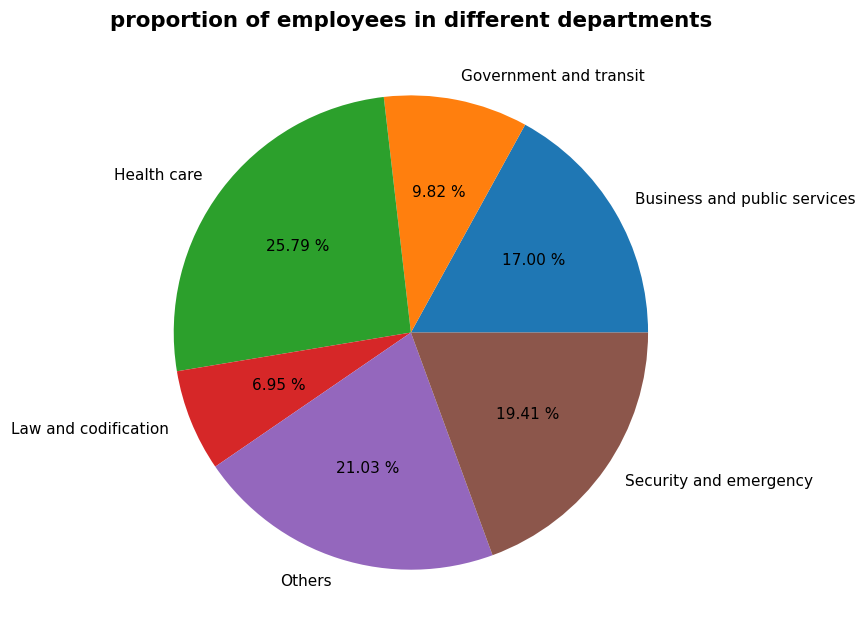

In [333]:
plt.figure(figsize=(14,7), dpi=110)
plt.title('proportion of employees in different departments', fontdict={'fontsize':14,'fontweight':'bold'})
plt.pie(pie_fig_table['Counts'], autopct='%.2f %%', labels=pie_fig_table['Department']) # type: ignore
plt.show()


From chart we will noticed that the most three common departments are:
1. Health Care 25.8%.
2. Security and Emergency 19.4%.
3. Business and public services 17%.

## E.Grouped Analysis:

In [334]:
cleaned_df

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...
148022,"Stationary Eng, Sewage Plant",0.00,0.00,0.00,0.0,0.00,0.00,2014
148023,Human Services Technician,0.00,0.00,0.00,0.0,0.00,0.00,2014
148024,Communications Dispatcher 2,0.00,0.00,0.00,0.0,0.00,0.00,2014
148025,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014


In [335]:
year_grouped_table = cleaned_df.groupby('Year').describe()

In [336]:
year_grouped_table[['BasePay']]

BasePay                                                          \
        count          mean           std    min        25%       50%   
Year                                                                    
2011  36159.0  63595.956517  40556.774993   0.00  33468.125  62871.72   
2012  36755.0  65456.016752  41773.079877   0.00  34092.865  64033.32   
2013  36996.0  69631.069053  44238.554247  15.83  37021.130  67669.83   
2014  38117.0  66567.914561  44052.300868   0.00  30156.090  65055.00   

                             
             75%        max  
Year                         
2011  90649.7650  294580.02  
2012  92433.6000  302578.00  
2013  98276.0925  319275.01  
2014  94738.1000  318835.49

In [337]:
year_grouped_table[['Benefits']]

Benefits                                                        \
        count          mean           std  min        25%       50%   
Year                                                                  
2011  36159.0      0.000000      0.000000  0.0      0.000      0.00   
2012  36755.0  26447.878767  15620.566665  0.0  13353.230  30644.85   
2013  36996.0  24131.805491  14668.462787  0.0  12641.005  27343.18   
2014  38117.0  24790.902829  15703.118625  0.0  10272.180  28427.19   

                           
            75%       max  
Year                       
2011      0.000      0.00  
2012  37202.690  84681.82  
2013  34028.605  86533.21  
2014  35445.100  96570.66

In [338]:
year_grouped_table[['OtherPay']]

OtherPay                                                           \
        count         mean          std  min    25%     50%        75%   
Year                                                                     
2011  36159.0  3617.081926  7959.889157  0.0  0.000  795.60  4057.7300   
2012  36755.0  3654.530981  7937.809148  0.0  9.845  922.75  4342.1200   
2013  36996.0  3811.008327  8403.565008  0.0  0.000  812.39  4485.7975   
2014  38117.0  3505.359263  7767.218152  0.0  0.000  695.89  4098.0300   

                 
            max  
Year             
2011  400184.25  
2012  245999.41  
2013  202322.37  
2014  342802.63

In [339]:
year_grouped_table[['OvertimePay']]

OvertimePay                                                       \
           count         mean           std  min  25%  50%        75%   
Year                                                                    
2011     36159.0  4531.065429  10501.367793  0.0  0.0  0.0  4215.0400   
2012     36755.0  5024.881965  11433.282541  0.0  0.0  0.0  4692.5350   
2013     36996.0  5368.577324  12078.231331  0.0  0.0  0.0  4851.0225   
2014     38117.0  5402.277180  11769.899988  0.0  0.0  0.0  5114.2800   

                 
            max  
Year             
2011  245131.88  
2012  220909.48  
2013  196689.18  
2014  173547.73

In [340]:
year_grouped_table[['TotalPay']]

TotalPay                                                          \
        count          mean           std    min        25%       50%   
Year                                                                    
2011  36159.0  71744.103871  47498.706594   0.00  36810.760  68213.24   
2012  36755.0  74135.429698  49514.731847   0.00  37586.705  70730.84   
2013  36996.0  78810.654705  52412.220534  15.83  40067.470  75254.37   
2014  38117.0  75475.551004  51693.444027   0.00  33481.500  72368.45   

                              
              75%        max  
Year                          
2011  102512.6800  567595.43  
2012  104133.0750  362844.66  
2013  110644.5025  347102.32  
2014  107980.0300  471952.64

In [341]:
year_grouped_table[['TotalPayBenefits']]

TotalPayBenefits                                                \
                count           mean           std    min       25%   
Year                                                                  
2011          36159.0   71744.103871  47498.706594   0.00  36810.76   
2012          36755.0  100583.308465  63541.514729   1.91  51843.31   
2013          36996.0  102942.460196  65854.295720  15.99  53783.84   
2014          38117.0  100266.453833  66232.474064   0.00  44266.79   

                                          
             50%          75%        max  
Year                                      
2011   68213.240  102512.6800  567595.43  
2012  101768.580  142408.3050  407274.78  
2013  103047.475  143962.5925  425815.28  
2014  101110.280  142749.7400  510732.68

In [342]:
salary_avg = year_grouped_table['TotalPay'][['mean']]
salary_avg = salary_avg.rename(columns={'mean':'salary_avg'}).reset_index()

salary_avg

,Year,salary_avg
0,2011,71744.103871
1,2012,74135.429698
2,2013,78810.654705
3,2014,75475.551004


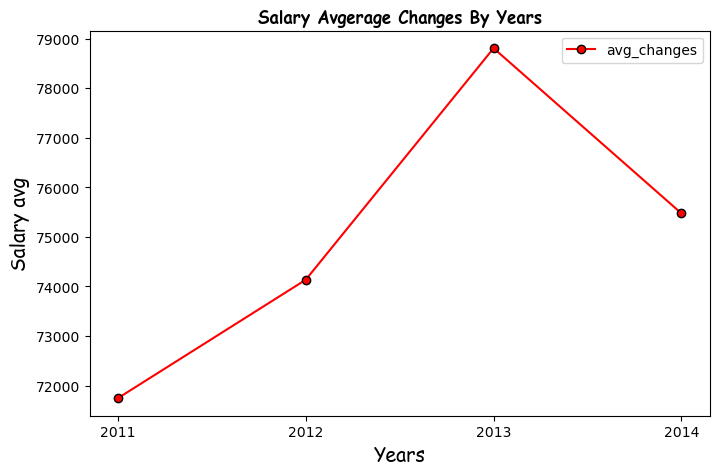

In [343]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(salary_avg['Year'],salary_avg['salary_avg'],"ro-",label='avg_changes',markeredgecolor='k')
plt.xlabel('Years',fontdict={"fontname":"Comic Sans MS",'fontsize':14})
plt.ylabel('Salary avg',fontdict={"fontname":"Comic Sans MS",'fontsize':14})
plt.xticks([2011,2012,2013,2014])
plt.title('Salary Avgerage Changes By Years',fontdict={"fontname":"Comic Sans MS",'fontweight':'bold'})
plt.legend()
plt.show()

**Results:**

* There is no any benefits in 2011.
* Overtime pay Avg increase over years.
* Other columns average ('otherPay','OverTimePay', 'TotalPay>Salary') increase over yaers and thats normal.
* There is significanly increase and decrease in 2013 and 2014 specially in 'TotalPay>Salary' despite of the increase of employees number in San Francisco in 2014.
* Thats not happened in 'TotalPayBenefits' because the benefits.

## F.Simple Correlation Analysis

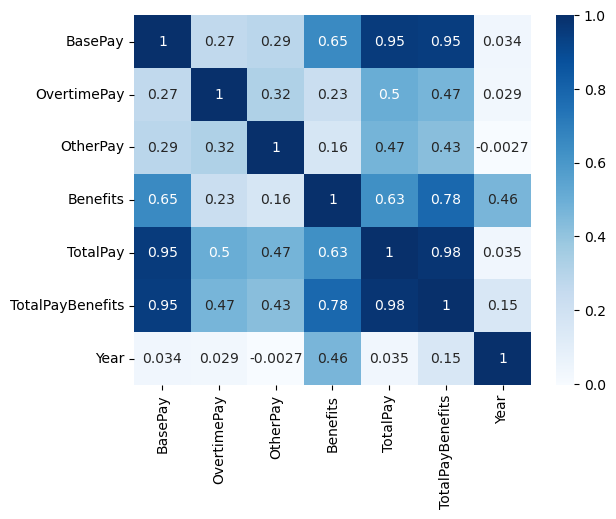

In [344]:
sns.heatmap(cleaned_df[numeric_cols + ordinal].corr(), cmap="Blues", annot=True)
plt.show()

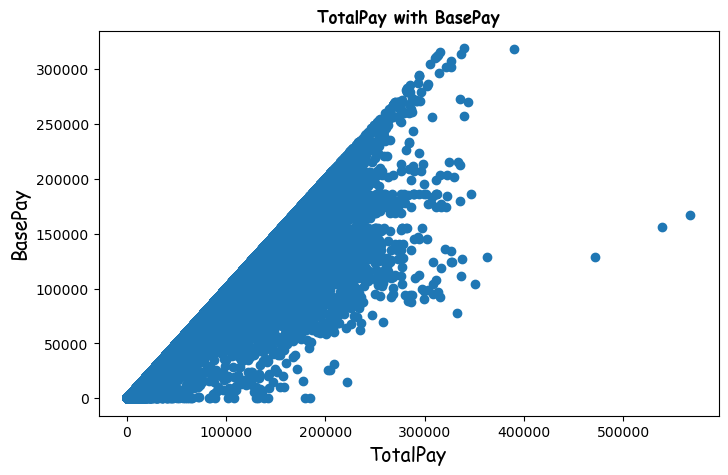

In [345]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(cleaned_df['TotalPay'],cleaned_df['BasePay'],"o")
plt.xlabel('TotalPay',fontdict={"fontname":"Comic Sans MS",'fontsize':14})
plt.ylabel('BasePay',fontdict={"fontname":"Comic Sans MS",'fontsize':14})
plt.title('TotalPay with BasePay',fontdict={"fontname":"Comic Sans MS",'fontweight':'bold'})
plt.show()

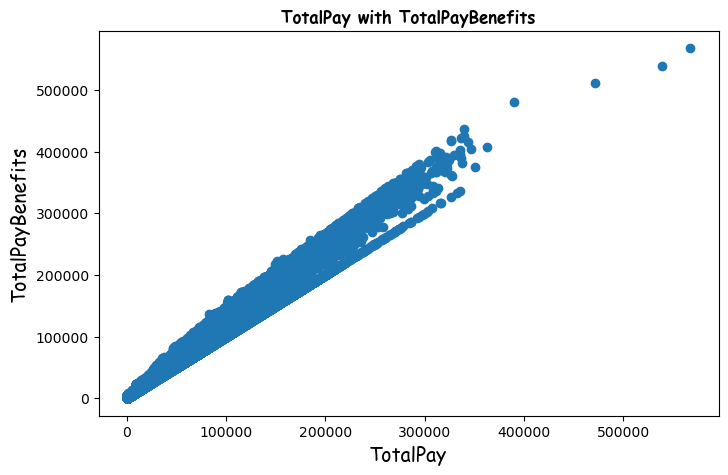

In [346]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(cleaned_df['TotalPay'],cleaned_df['TotalPayBenefits'],"o")
plt.xlabel('TotalPay',fontdict={"fontname":"Comic Sans MS",'fontsize':14})
plt.ylabel('TotalPayBenefits',fontdict={"fontname":"Comic Sans MS",'fontsize':14})
plt.title('TotalPay with TotalPayBenefits',fontdict={"fontname":"Comic Sans MS",'fontweight':'bold'})
plt.show()

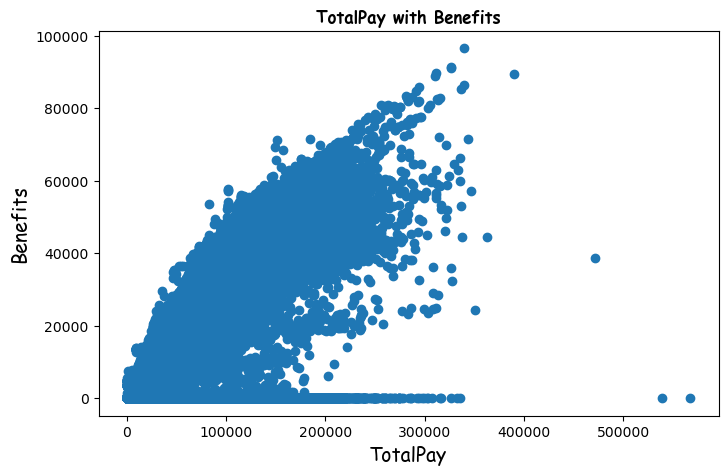

In [347]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(cleaned_df['TotalPay'],cleaned_df['Benefits'],"o")
plt.xlabel('TotalPay',fontdict={"fontname":"Comic Sans MS",'fontsize':14})
plt.ylabel('Benefits',fontdict={"fontname":"Comic Sans MS",'fontsize':14})
plt.title('TotalPay with Benefits',fontdict={"fontname":"Comic Sans MS",'fontweight':'bold'})
plt.show()

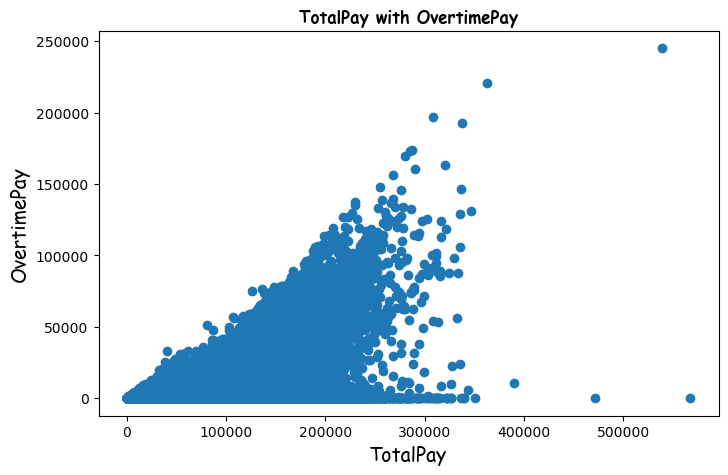

In [348]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(cleaned_df['TotalPay'],cleaned_df['OvertimePay'],"o")
plt.xlabel('TotalPay',fontdict={"fontname":"Comic Sans MS",'fontsize':14})
plt.ylabel('OvertimePay',fontdict={"fontname":"Comic Sans MS",'fontsize':14})
plt.title('TotalPay with OvertimePay',fontdict={"fontname":"Comic Sans MS",'fontweight':'bold'})
plt.show()

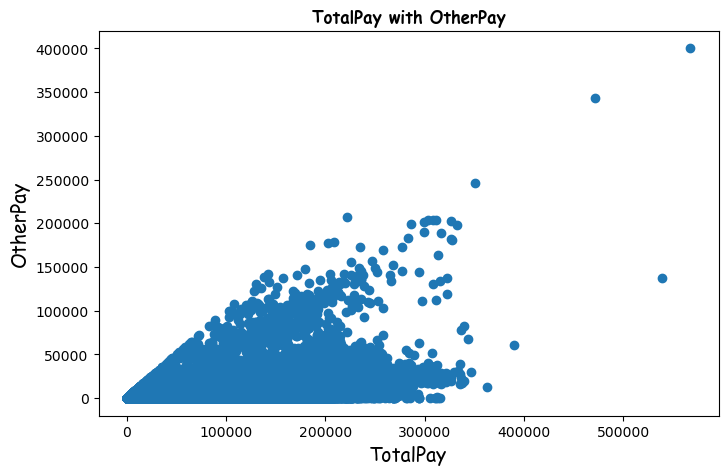

In [349]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(cleaned_df['TotalPay'],cleaned_df['OtherPay'],"o")
plt.xlabel('TotalPay',fontdict={"fontname":"Comic Sans MS",'fontsize':14})
plt.ylabel('OtherPay',fontdict={"fontname":"Comic Sans MS",'fontsize':14})
plt.title('TotalPay with OtherPay',fontdict={"fontname":"Comic Sans MS",'fontweight':'bold'})
plt.show()

**Results**
* The salary('TotalPay') has a very high correlation with 'BasePay' and 'TotalBayBenefits' and that normal because TotalPay is the sum of 'BasePay','OverTimePay' and 'OtherPay' also 'TotalBayBenefits' is the sum of 'TotalPay' and 'Benefits'.
* The salary('TotalPay') has correlation with 'OverTimePay' and 'OtherPay'.
* The salary('TotalPay) has correlation with 'Benefits' and that means in general the 'Benefits' will increase if 'TotalPay' increase.

## G.Summary of Insights

The Dataset is about different jobs employees slalries and incomes in USA, San Francisco agency during 2011, 2012, 2013 and 2014 years and the data set contains Employees Id and Name and his Base pay overtime pay other pay and the salary ('TotalPay') which is the sum of the columns we mentioned before also we have Total pay benefits which is the sum of salary and benefits and the ageny name which is San Francisco for all employees.


The Dataset contains data about 148650 employee. More than 50% of them don't work overtime and more than 25% of employees dont have other pay. The most common Job is Transit Operator.The dataset have a wide salary range and that means there are a big variace between there salaries also the salary have high standard deviation and that mean there is outliers and the nost of them are negative values (unlogical) besides, we fount some employees with 0 salary. we considered this value logical value which maybe refers to the employees that took unpaid vacation during these years or they are volunteers.


During cleaning process we droped all columns that contains only NaNs values('Notes' and 'Status') or does not contain useful information ('EmployeeName', 'Id' and 'Agency') also we droped all rows that contains NaNs belong to columns have less than 0.5% or contains negative value for numerical columns. However, we filled the Nans values in 'Benefits' column using data imputation techniques because 24.4% of its values are Nans and we dropped the raws that have 'Not provided' as employee name value.


The data doesn't contain job department information so we used NLP and Machine Learning techniques to cluster them into job titles (If you want to know the details plaase see the Proportion of employees in different departments part in Basic Data Visualization section in this notebook).


There are alot of employees have low salary (less than 10000$) and there are about 368 employees with 0 salary and most of salaries are between 50000$-150000$. We noticed that the most three common departments are: 
1. Health Care 25.8% of jobs. 
2. Security and Emergency 19.4% of jobs.
3. Business and public services 17% of jobs. 



There was no any benefits for San Francisco employees in 2011 and Other columns average ('otherPay','OverTimePay', 'TotalPay>Salary') were increased over yaers which is considerd normal. On the other hand, there is significanly increase and decrease in 2013 and 2014 specially in 'TotalPay>Salary' despite of the increase of employees number in San Francisco in 2014 and that's not happened in 'TotalPayBenefits' because the benefits.


Finally, we studied the salary simple correlation with other columns the salary('TotalPay') has a very high correlation with 'BasePay' and 'TotalBayBenefits' and that normal because TotalPay is the sum of 'BasePay','OverTimePay' and 'OtherPay' also 'TotalBayBenefits' is the sum of 'TotalPay' and 'Benefits'. he salary('TotalPay') has also correlation with 'OverTimePay' and 'OtherPay' and it has correlation with 'Benefits' and that means in general the 'Benefits' will increase if 'TotalPay' increase.



Eng.Yhya Altroudi